In [16]:
import numpy as np #maejo de arreglos algebra lineal
import pandas as pd #manejo dataframes tipo datos
import matplotlib.pyplot as plt #graficas
import seaborn as sns #graficas estadísticas
import random

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQs7acVB35L3qigzmd3kFpA77hxVqdQq-s2qK-h3AMahFlmskTTpvNcjBx8WxzTb2etvA1gsofgoW8w/pub?output=csv"
x_ = pd.read_csv(url)
x_ = x_.values

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42) #se crea un objeto kmeans con las propiedades del algoritmo
clusters = kmeans.fit_predict(x_) # Asingando los datos y otorgandoles etiquetas (4, por número de clusters)
##Investigar método del codo

In [20]:
from sklearn.decomposition import PCA
#Crear un objeto PCA (Principal Component Analysis) y ajustar los datos
pca = PCA(n_components=3) #Queremos las tres primeras componentes principales
x_pca = pca.fit_transform(x_)

In [21]:
# Ver centroides
centroides_kmeans = kmeans.cluster_centers_
centroides_kmeans

array([[ 6.33581785e+01,  6.22628002e+01,  3.62093339e+01,
         4.96635705e+01,  5.37365202e+01,  6.14975079e+01,
         6.72229271e+01,  6.15033983e+01,  6.28507023e+01,
         4.03330313e+01,  3.24864069e+01,  4.62344812e+01,
         3.37349343e+01,  3.14841414e+01,  3.96454463e+01,
         4.42976892e+01,  4.41900770e+01,  3.35144993e+01,
         5.83162664e+01,  5.28642954e+01,  3.85430449e+01,
         5.01880381e+01,  5.71703670e+01,  5.91748981e+01,
         5.93527413e+01,  5.58738106e+01,  5.44209334e+01,
         6.09537834e+01,  5.88898958e+01,  6.08214771e+01,
         6.33083371e+01,  6.12816040e+01,  6.77007250e+01,
         6.49007703e+01,  6.99062075e+01,  6.31574536e+01,
         2.77548709e+00,  2.04938831e+00,  2.49306751e+01,
         5.85309579e-13, -5.77315973e-13, -3.69482223e-13,
         6.53699317e-13, -5.57776048e-13,  7.38785682e-01],
       [ 6.97177343e+01,  6.97027181e+01,  5.87873028e+01,
         6.56673636e+01,  6.87211557e+01,  6.26417031e+

In [22]:
centroides_kmeans_pca = pca.transform(centroides_kmeans)
centroides_kmeans_pca

array([[  0.41678723,  55.50605534, -16.4036369 ],
       [-52.1241272 ,   3.24124452,  22.77204896],
       [186.87573367, -15.25648431,  31.67938053],
       [-14.34282613, -50.18204287, -22.46849065]])

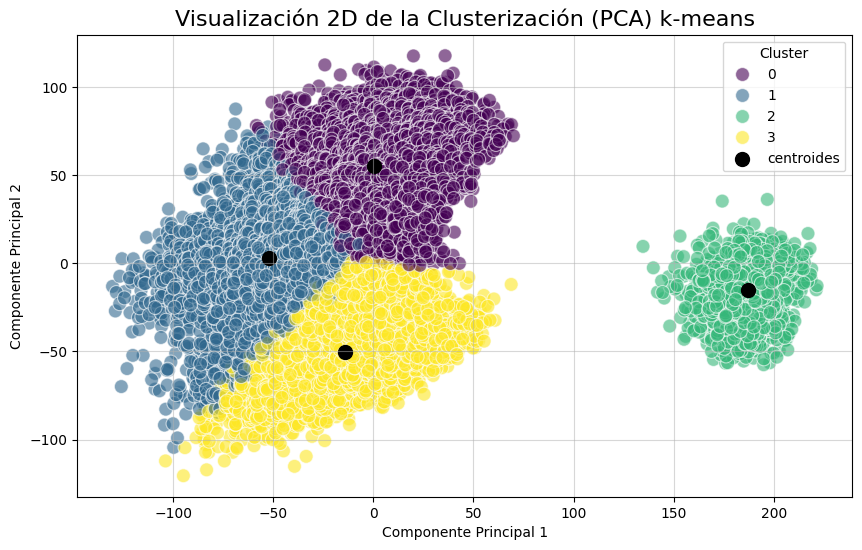

In [24]:
centroides_kmeans_pca = pca.transform(centroides_kmeans)
centroides_kmeans_pca

def graficar_clusters_PCA2D(clusters, metodo, centroids):
    # Crear un gráfico de dispersión 2D usando las dos primeras componentes
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1],
                    hue=clusters, palette='viridis',
                    alpha=0.6, s = 100)
    plt.scatter(centroids[:,0], centroids[:,1], c= 'black', s = 100, label = 'centroides')
    plt.title(f'Visualización 2D de la Clusterización (PCA) {metodo}', fontsize=16)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(True)
    plt.grid(linestyle = '-', alpha  = 0.5)
    plt.legend(title='Cluster')
    plt.show()

kmeans_2D = graficar_clusters_PCA2D(clusters, "k-means", centroides_kmeans_pca)
kmeans_2D

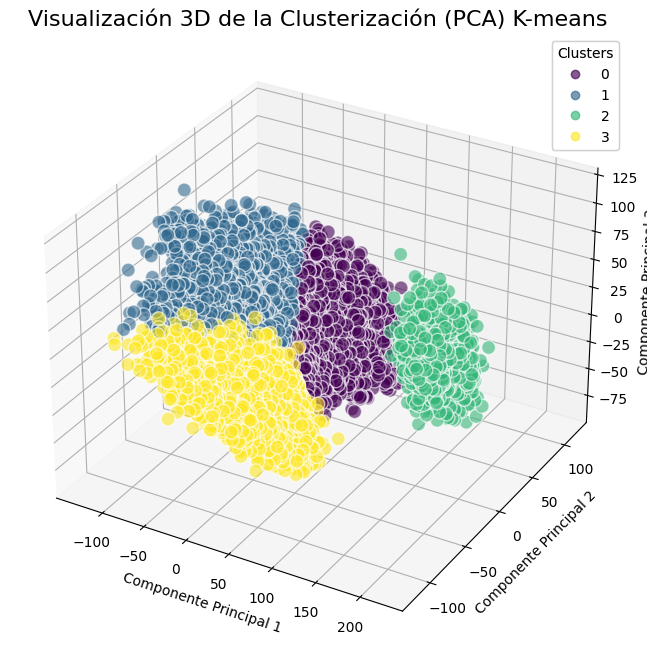

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

def graficar_clusters_PCA3D(clusters, kmeans_3D):
    # Crear el gráfico 3D
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Graficar los puntos con borde blanco
    scatter = ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2],
                         c=clusters, cmap='viridis', s=100,
                         edgecolor='white', alpha=0.6)

    ax.set_title(f'Visualización 3D de la Clusterización (PCA) {kmeans_3D}', fontsize=16)
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')

    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)

    plt.show()
graficar_clusters_PCA3D(clusters, 'K-means')